<b>Import of required libraries</b>

In [2]:
import random
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.neural_network import MLPClassifier # Import Multilayer Perceptron Classifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import shapiro, bartlett, kruskal, friedmanchisquare, mannwhitneyu, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.api import DescrStatsW

<b>Read data from csv</b>

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<b>Replace NaNs in Year column</b>

In [4]:
print(f'Number of rows:\t {df.shape[0]}',
      f'\nNaNs count:\t {df.Year.isna().sum()}',
      f'\nYear mean:\t {df.Year.mean()}',
      f'\nYear median:\t {df.Year.median()}',
      f'\nYear mode:\t {df.Year.mode()[0]}')

# replace NaNs in Year column with mode value
df.loc[df.Year.isna(), 'Year'] = df.Year.mode()[0]

print(f'\nStats after NaNs replacement in Year column',
      f'\nNaNs count:\t {df.Year.isna().sum()}',
      f'\nYear mean:\t {df.Year.mean()}',
      f'\nYear median:\t {df.Year.median()}',
      f'\nYear mode:\t {df.Year.mode()[0]}')

# cast Year column to int32 type
df['Year'] = df.Year.astype('int32')

print(f'\nDataframe after casting Year column to int32')

df.head()

Number of rows:	 16598 
NaNs count:	 271 
Year mean:	 2006.4064433147546 
Year median:	 2007.0 
Year mode:	 2009.0

Stats after NaNs replacement in Year column 
NaNs count:	 0 
Year mean:	 2006.448789010724 
Year median:	 2007.0 
Year mode:	 2009.0

Dataframe after casting Year column to int32


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<b>Replace NaNs in Publisher column</b>

In [5]:
print(f'NaNs before replacement',
      f'\nNaNs count:\t {df.Publisher.isna().sum()}')

# replace NaNs in Publisher column with 'Other' value
df.loc[df.Publisher.isna(), 'Publisher'] = 'Other'

print(f'\nNaNs after replacement',
      f'\nNaNs count:\t {df.Publisher.isna().sum()}')

NaNs before replacement 
NaNs count:	 58

NaNs after replacement 
NaNs count:	 0


<b>Describe each column in the dataset</b>

In [6]:
def describe_rank_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values: \t{column.isna().sum()}',
          f'\nValues count: \t{column.count()}',
          f'\nMin: \t\t{column.min()}',
          f'\nMax: \t\t{column.max()}',
          f'\nINFO: The 2 missing ranks are caused by the author of the dataset, who dropped them due to incomplete information\n')

def describe_name_column(column, description):
    field_length = column.astype(str).map(len)
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values: \t{column.isna().sum()}',
          f'\nValues count: \t{column.count()}',
          f'\nLongest name: \t{column[field_length.idxmax()]} ({field_length.max()})',
          f'\nLongest name game: https://www.play-asia.com/ds-yamamura-misa-suspense-maiko-kogiku-kisha-katherine-sougi/13/702on0',
          f'\nShortest name: \t{column[field_length.idxmin()]} ({field_length.min()})',
          f'\nShortest name game: https://en.wikipedia.org/wiki/D_(video_game)\n')
    
def describe_quantitative_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values:   {column.isna().sum()}',
          f'\nVar: \t     {np.nanvar(column)}',
          f'\n{column.describe()}\n')

def describe_qualitative_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values:  {column.isna().sum()}',
          f'\nValue  count\n{column.value_counts()}\n')
    
describe_rank_column(df.Rank, 'Game position in ranking based on global sales')

describe_name_column(df.Name, 'The name of the game')

describe_qualitative_column(df.Platform, 'Platform of the games release (Sega Saturn(SAT), Atari2600(2600),'
                            + ' Dreamcast(DC), Sega Genesis(GEN), Neo Geo(NG), \nSupplemental Computing Device(SCD),'
                            + ' WonderSwan(WS), Panasonic 3DO(3DO), TurboGrafx-16(TG16), NEC PC-FX(PCFX),'
                            + ' \nSega Game Gear(GG) etc.)')
describe_qualitative_column(df.Genre, 'Genre of the game')
describe_qualitative_column(df.Publisher, 'Publisher of the game')

describe_quantitative_column(df.Year, 'Year of the game\'s release')

describe_quantitative_column(df.NA_Sales, 'Sales in North America (in millions)')
describe_quantitative_column(df.EU_Sales, 'Sales in Europe (in millions)')
describe_quantitative_column(df.JP_Sales, 'Sales in Japan (in millions)')
describe_quantitative_column(df.Other_Sales, 'Sales in the rest of the world (in millions)')
describe_quantitative_column(df.Global_Sales, 'Total worldwide sales (in millions)')

=== Rank column description === 

Game position in ranking based on global sales 

Data type: 	int64 
NA values: 	0 
Values count: 	16598 
Min: 		1 
Max: 		16600 
INFO: The 2 missing ranks are caused by the author of the dataset, who dropped them due to incomplete information

=== Name column description === 

The name of the game 

Data type: 	object 
NA values: 	0 
Values count: 	16598 
Longest name: 	DS Yamamura Misa Suspense: Maiko Kogiku - Kisha Katherine - Sougiya Isa Akashi - Koto ni Maru Hana Sanrin: Kyoto Satujin Jinken File (132) 
Longest name game: https://www.play-asia.com/ds-yamamura-misa-suspense-maiko-kogiku-kisha-katherine-sougi/13/702on0 
Shortest name: 	D (1) 
Shortest name game: https://en.wikipedia.org/wiki/D_(video_game)

=== Platform column description === 

Platform of the games release (Sega Saturn(SAT), Atari2600(2600), Dreamcast(DC), Sega Genesis(GEN), Neo Geo(NG), 
Supplemental Computing Device(SCD), WonderSwan(WS), Panasonic 3DO(3DO), TurboGrafx-16(TG16), NE

<b>Add column containing discretized values</b>

In [7]:
def specify_decade(year):
    decade_dict = {
        1990: '80\'s',
        2000: '90\'s',
        2010: '00\'s',
        2021: '10\'s'
    }
    for decade in decade_dict.keys():
        if year < decade:
            return decade_dict[decade]
        
df['Decade'] = df['Year'].apply(specify_decade)

df[['Year', 'Decade']].head(20)

,Year,Decade
0,2006,00's
1,1985,80's
2,2008,00's
3,2009,00's
4,1996,90's
5,1989,80's
6,2006,00's
7,2006,00's
8,2009,00's
9,1984,80's


<b>Analyze the data</b>
* do some data mining,
* discover the structure of the data,
* search for sources of interesting conclusions

In [8]:
# add new columns showing percentage of game copies sold 
# in NA, EU, JP and rest of the world respectively
df['NA_Sales_Percentage'] = 100 * (df['NA_Sales'] / df['Global_Sales']).round(3)
df['EU_Sales_Percentage'] = 100 * (df['EU_Sales'] / df['Global_Sales']).round(3)
df['JP_Sales_Percentage'] = 100 * (df['JP_Sales'] / df['Global_Sales']).round(3)
df['Other_Sales_Percentage'] = 100 * (df['Other_Sales'] / df['Global_Sales']).round(3)

In [9]:
# create histogram of games' global sales
# create box plots for global sales in each genre

# data about global sales of games in each genre
action_sales = df[df['Genre'] == 'Action']['Global_Sales']
sports_sales = df[df['Genre'] == 'Sports']['Global_Sales']
misc_sales = df[df['Genre'] == 'Misc']['Global_Sales']
role_playing_sales = df[df['Genre'] == 'Role-Playing']['Global_Sales']
shooter_sales = df[df['Genre'] == 'Shooter']['Global_Sales']
adventure_sales = df[df['Genre'] == 'Adventure']['Global_Sales']
racing_sales = df[df['Genre'] == 'Racing']['Global_Sales']
platform_sales = df[df['Genre'] == 'Platform']['Global_Sales']
simulation_sales = df[df['Genre'] == 'Simulation']['Global_Sales']
fighting_sales = df[df['Genre'] == 'Fighting']['Global_Sales']
strategy_sales = df[df['Genre'] == 'Strategy']['Global_Sales']
puzzle_sales = df[df['Genre'] == 'Puzzle']['Global_Sales']

# data for bar plot about global game sales depending on genre
action_total_sales = action_sales.sum()
sports_total_sales = sports_sales.sum()
misc_total_sales = misc_sales.sum()
role_playing_total_sales = role_playing_sales.sum()
shooter_total_sales = shooter_sales.sum()
adventure_total_sales = adventure_sales.sum()
racing_total_sales = racing_sales.sum()
platform_total_sales = platform_sales.sum()
simulation_total_sales = simulation_sales.sum()
fighting_total_sales = fighting_sales.sum()
strategy_total_sales = strategy_sales.sum()
puzzle_total_sales = puzzle_sales.sum()

# create new dataframe for aggregated data
sales_df = pd.DataFrame(index=['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter',
                               'Adventure', 'Racing', 'Platform', 'Simulation',
                               'Fighting', 'Strategy', 'Puzzle'])

# add data to dataframe
sales_df['Total_Sales'] = [action_total_sales, sports_total_sales, misc_total_sales, role_playing_total_sales,
                           shooter_total_sales, adventure_total_sales, racing_total_sales, platform_total_sales,
                           simulation_total_sales, fighting_total_sales, strategy_total_sales, puzzle_total_sales]

# data for bar plot about number of titles in each genre
action_titles = action_sales.count()
sports_titles = sports_sales.count()
misc_titles = misc_sales.count()
role_playing_titles = role_playing_sales.count()
shooter_titles = shooter_sales.count()
adventure_titles = adventure_sales.count()
racing_titles = racing_sales.count()
platform_titles = platform_sales.count()
simulation_titles = simulation_sales.count()
fighting_titles = fighting_sales.count()
strategy_titles = strategy_sales.count()
puzzle_titles = puzzle_sales.count()

# add data to dataframe
sales_df['Num_of_Titles'] = [action_titles, sports_titles, misc_titles, role_playing_titles,
                             shooter_titles, adventure_titles, racing_titles, platform_titles,
                             simulation_titles, fighting_titles, strategy_titles, puzzle_titles]

# add to dataframe data for a bar plot about the global game sales 
# divided by a number of released titles in each genre
sales_df['Sales_Mean'] = sales_df['Total_Sales'] / sales_df['Num_of_Titles']


# data for a bar plot about the median of the global game sales in each genre
action_sales_median = action_sales.median()
sports_sales_median = sports_sales.median()
misc_sales_median = misc_sales.median()
role_playing_sales_median = role_playing_sales.median()
shooter_sales_median = shooter_sales.median()
adventure_sales_median = adventure_sales.median()
racing_sales_median = racing_sales.median()
platform_sales_median = platform_sales.median()
simulation_sales_median = simulation_sales.median()
fighting_sales_median = fighting_sales.median()
strategy_sales_median = strategy_sales.median()
puzzle_sales_median = puzzle_sales.median()

# add data to dataframe
sales_df['Sales_Median'] = [action_sales_median, sports_sales_median, misc_sales_median,
                            role_playing_sales_median, shooter_sales_median, adventure_sales_median,
                            racing_sales_median, platform_sales_median, simulation_sales_median,
                            fighting_sales_median, strategy_sales_median, puzzle_sales_median]

sales_df['NA_Sales_Mean'] = np.nan
sales_df['EU_Sales_Mean'] = np.nan
sales_df['JP_Sales_Mean'] = np.nan
sales_df['Other_Sales_Mean'] = np.nan

sales_df['NA_Sales_Median'] = np.nan
sales_df['EU_Sales_Median'] = np.nan
sales_df['JP_Sales_Median'] = np.nan
sales_df['Other_Sales_Median'] = np.nan

sales_df['NA_Sales_Global_Percent'] = np.nan
sales_df['EU_Sales_Global_Percent'] = np.nan
sales_df['JP_Sales_Global_Percent'] = np.nan
sales_df['Other_Sales_Global_Percent'] = np.nan

for genre in list(sales_df.index.values):
    sales_df.loc[[genre], ['NA_Sales_Mean']] = df[df['Genre'] == genre]['NA_Sales'].mean()
    sales_df.loc[[genre], ['EU_Sales_Mean']] = df[df['Genre'] == genre]['EU_Sales'].mean()
    sales_df.loc[[genre], ['JP_Sales_Mean']] = df[df['Genre'] == genre]['JP_Sales'].mean()
    sales_df.loc[[genre], ['Other_Sales_Mean']] = df[df['Genre'] == genre]['Other_Sales'].mean()

    sales_df.loc[[genre], ['NA_Sales_Median']] = df[df['Genre'] == genre]['NA_Sales'].median()
    sales_df.loc[[genre], ['EU_Sales_Median']] = df[df['Genre'] == genre]['EU_Sales'].median()
    sales_df.loc[[genre], ['JP_Sales_Median']] = df[df['Genre'] == genre]['JP_Sales'].median()
    sales_df.loc[[genre], ['Other_Sales_Median']] = df[df['Genre'] == genre]['Other_Sales'].median()
    
    sales_df.loc[[genre], ['NA_Sales_Global_Percent']] = df[df['Genre'] == genre]['NA_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['EU_Sales_Global_Percent']] = df[df['Genre'] == genre]['EU_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['JP_Sales_Global_Percent']] = df[df['Genre'] == genre]['JP_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['Other_Sales_Global_Percent']] = df[df['Genre'] == genre]['Other_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']

# change the order of columns to make it more readable
sales_df = sales_df[['Total_Sales', 'Num_of_Titles', 'Sales_Mean', 'NA_Sales_Mean',
                     'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean', 'Sales_Median',
                     'NA_Sales_Median', 'EU_Sales_Median', 'JP_Sales_Median', 'Other_Sales_Median',
                     'NA_Sales_Global_Percent', 'EU_Sales_Global_Percent', 'JP_Sales_Global_Percent',
                     'Other_Sales_Global_Percent']]
sales_df

,Total_Sales,Num_of_Titles,Sales_Mean,NA_Sales_Mean,EU_Sales_Mean,JP_Sales_Mean,Other_Sales_Mean,Sales_Median,NA_Sales_Median,EU_Sales_Median,JP_Sales_Median,Other_Sales_Median,NA_Sales_Global_Percent,EU_Sales_Global_Percent,JP_Sales_Global_Percent,Other_Sales_Global_Percent
Action,1751.18,3316,0.528100,0.264726,0.158323,0.048236,0.056508,0.190,0.10,0.03,0.00,0.01,0.501279,0.299798,0.091338,0.107002
Sports,1330.93,2346,0.567319,0.291283,0.160635,0.057702,0.057532,0.220,0.11,0.02,0.00,0.01,0.513438,0.283148,0.101711,0.101410
Misc,809.96,1739,0.465762,0.235906,0.124198,0.061967,0.043312,0.160,0.08,0.01,0.00,0.01,0.506494,0.266655,0.133044,0.092992
Role-Playing,927.37,1488,0.623233,0.219946,0.126384,0.236767,0.040060,0.185,0.04,0.01,0.05,0.01,0.352912,0.202789,0.379902,0.064279
Shooter,1037.37,1310,0.791885,0.444733,0.239137,0.029221,0.078389,0.230,0.12,0.05,0.00,0.02,0.561613,0.301985,0.036901,0.098991
Adventure,239.04,1286,0.185879,0.082271,0.049868,0.040490,0.013072,0.060,0.00,0.00,0.01,0.00,0.442604,0.268281,0.217830,0.070323
Racing,732.04,1249,0.586101,0.287766,0.190865,0.045388,0.061865,0.190,0.10,0.04,0.00,0.01,0.490984,0.325652,0.077441,0.105554
Platform,831.37,886,0.938341,0.504571,0.227573,0.147596,0.058228,0.280,0.14,0.05,0.00,0.01,0.537727,0.242527,0.157295,0.062054
Simulation,392.20,867,0.452364,0.211430,0.130773,0.073472,0.036355,0.160,0.07,0.01,0.00,0.01,0.467389,0.289087,0.162417,0.080367
Fighting,448.91,848,0.529375,0.263667,0.119481,0.103007,0.043255,0.210,0.08,0.03,0.01,0.01,0.498073,0.225702,0.194582,0.081709


Text(0, 0.5, "Number of games' titles")

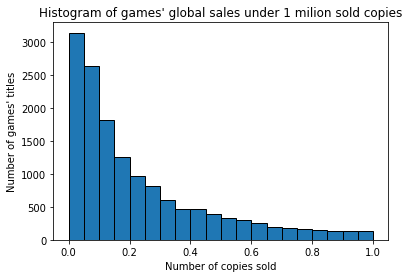

In [10]:
# histogram of games global sales (games, which copies haven't been sold more than 1 milion times)
plt.hist(df[df['Global_Sales'] <= 1]['Global_Sales'],
         bins=[0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35,
               0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75,
               0.80, 0.85, 0.90, 0.95, 1.00],
         ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales under 1 milion sold copies')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

Text(0, 0.5, "Number of games' titles")

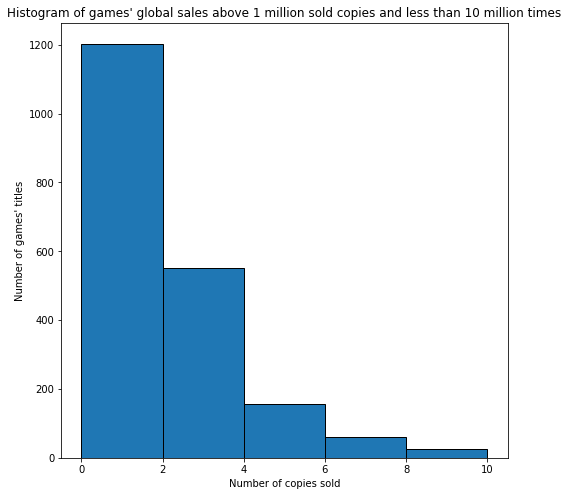

In [11]:
# histogram of games global sales (games, which copies have been sold more than 1 milion times and more than 10 times)
plt.hist(df[(df['Global_Sales'] > 1) & (df['Global_Sales'] <= 10)]['Global_Sales'],
         bins=[0, 2, 4, 6, 8, 10],
         ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales above 1 million sold copies and less than 10 million times')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

Text(0, 0.5, "Number of games' titles")

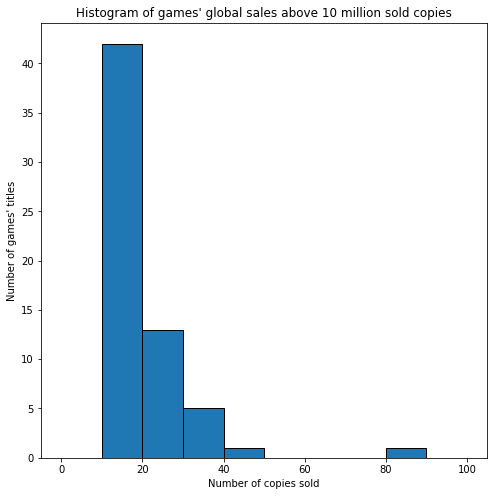

In [12]:
# histogram of games global sales (games, which copies have been sold more than 1 milion times and more than 10 times)
plt.hist(df[df['Global_Sales'] > 10]['Global_Sales'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales above 10 million sold copies')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

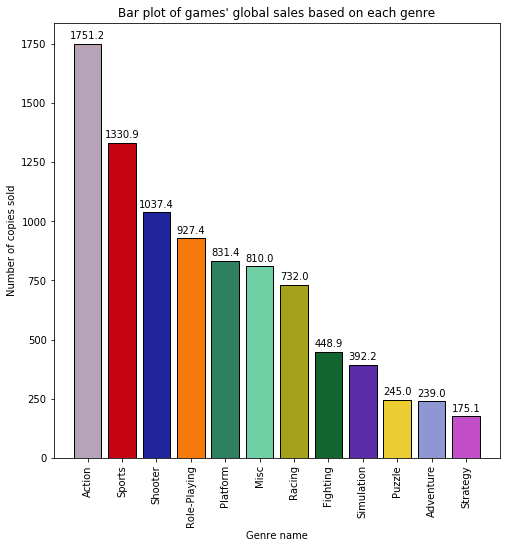

In [13]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df['Total_Sales'].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
blue_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
green_values = random.sample(range(1, 255), len(bar_plot_df.index.values))

rects1 = ax.bar(x=range(len(bar_plot_df.index.values)),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(bar_plot_df.index.values))])

ax.set_xticks(np.arange(len(bar_plot_df.index.values)))
ax.set_xticklabels(bar_plot_df.index.values, rotation=90)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of games\' global sales based on each genre')
ax.set_xlabel('Genre name')
ax.set_ylabel('Number of copies sold')

autolabel(rects1)

Text(0, 0.5, 'Number of copies sold globally')

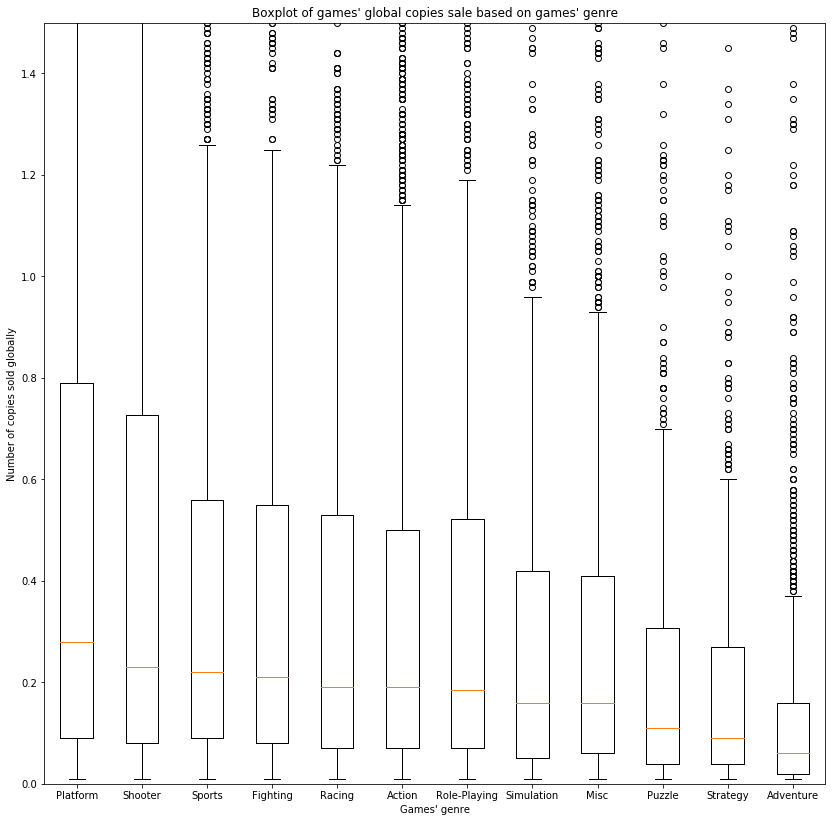

In [14]:
# boxplot for games global copies sale based on games' genre
plt.figure(figsize=(14, 14))
plt.boxplot((platform_sales,
             shooter_sales,
             sports_sales,
             fighting_sales,
             racing_sales,
             action_sales,
             role_playing_sales,
             simulation_sales,
             misc_sales,
             puzzle_sales,
             strategy_sales,
             adventure_sales),
            labels=sales_df['Sales_Median'].sort_values(axis=0, ascending=False).index.values)

plt.ylim(0, 1.5)
plt.title('Boxplot of games\' global copies sale based on games\' genre')
plt.xlabel('Games\' genre')
plt.ylabel('Number of copies sold globally')

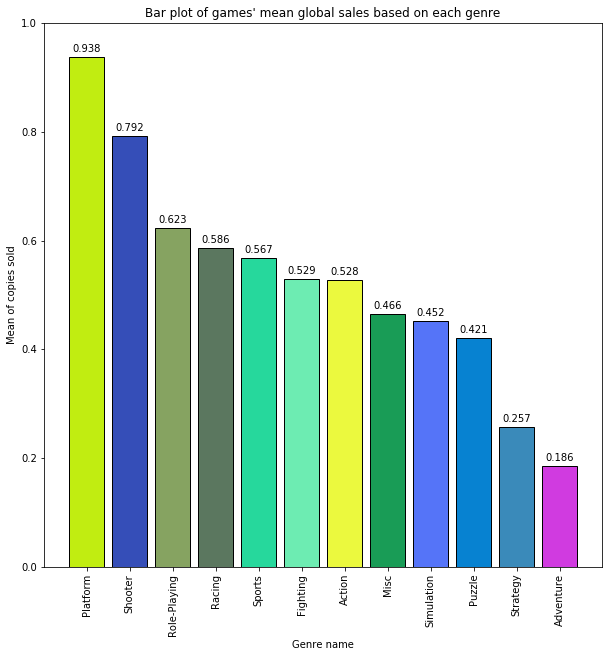

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df['Sales_Mean'].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
blue_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
green_values = random.sample(range(1, 255), len(bar_plot_df.index.values))

rects1 = ax.bar(x=range(len(bar_plot_df.index.values)),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(bar_plot_df.index.values))])

ax.set_xticks(np.arange(len(bar_plot_df.index.values)))
ax.set_xticklabels(bar_plot_df.index.values, rotation=90)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of games\' mean global sales based on each genre')
ax.set_xlabel('Genre name')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 1])

autolabel(rects1)

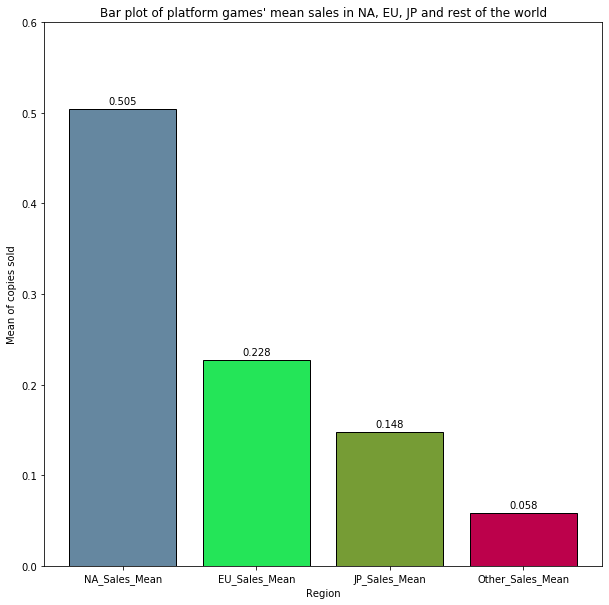

In [16]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Platform', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of platform games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.6])

autolabel(rects1)

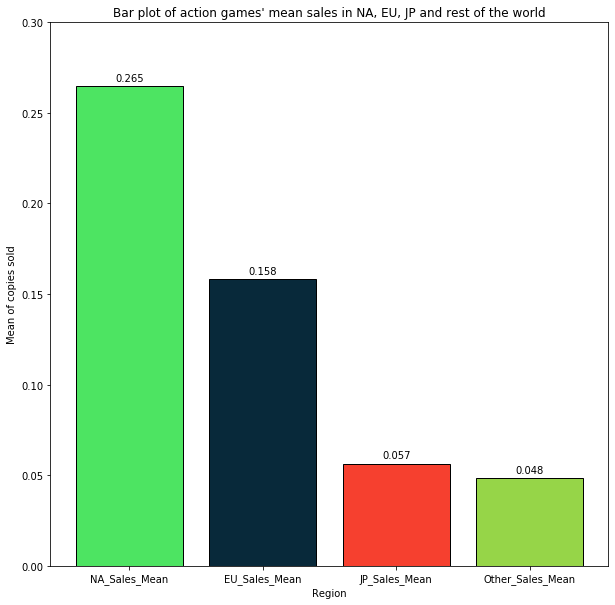

In [17]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Action', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of action games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.3])

autolabel(rects1)

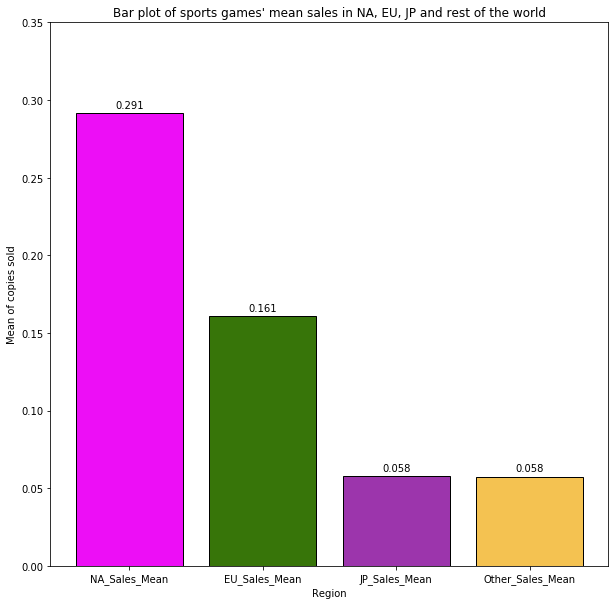

In [18]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Sports', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of sports games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.35])

autolabel(rects1)

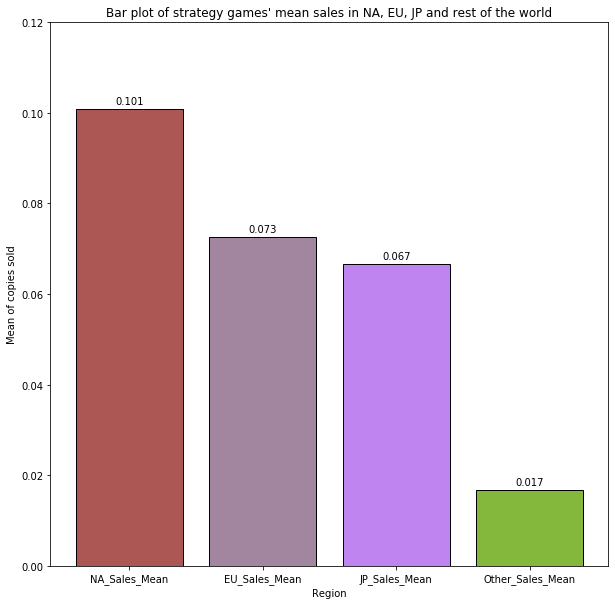

In [19]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Strategy', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of strategy games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.12])

autolabel(rects1)

<b>Conclusions after the analysis</b>

* Action games is the genre with the highest number of sold copies - this is caused by the fact, that this genre has the most titles in the dataset.<br/><br/>

* Sports games is the genre with the second highest number of sold copies - this is genre for casual gamers and a lot of people pleys them.<br/><br/>

* Strategy games is the genre with the second lowest number of sold copies - this games require a lot of thinking and not many people want to think and analyze a lot in their free time.<br/><br/>

* Adventure games is the genre with the lowest number of sold copies - this is caused by the fact, that they are commonly considered boring and they must have great plot to provide satisfying gameplay.<br/><br/>

* Platform games and Shooter games are genres with the highest median and mean of sold copies. That may be caused, because of the fact, that important part of this genres are very popular titles, which can disrupt the mean of the whole sample.<br/><br/>

* Strategy and Adventure games are genres with the lowest median and mean of sold copies - that may be caused by the fact, that strategy games are considered hard and require many different skills. On the other hand adventure games don't have as many fans as e.g. Action games, because they often don't provide so emotional and surprising gameplay full of special effects. They also require solving logical riddles and many people don't like that.<br/><br/>

* Platform games and Shooter games are genres with the highest interquartile range (IQR), because a lot of titles in this genre are very popular, but many titles have a small group of fans, which results in the lower number of sold copies in contrast to the high number of more popular titles.<br/><br/>

* European and Japanese gamers like strategy games - they are entertained, when they can think about solving the problem.<br/><br/>

* Sports games are much more popular in North America than in the Europe and Japan.<br/><br/>

* Europe and North America are more simmilar, when it comes to Action game sales than sports games.<br/><br/>

* Japanese gamers really like strategy games - they buy them almost as much as the whole Europe.<br/><br/>

* North Americans love platform games - maybe that's caused by the fact, that many platform games are considered retro and arcade. This is a big part of north american gamers culture.

<b>Naive Bayes Classifier and Multilayer Perceptron Classifier example (evaulation by cross-validation)</b>

In [20]:
# check correlation between game's genre and percentage of copies sold in North America, Europe and Japan
print(f'Correlation between Genre and NA_Sales_Percentage: \t\t{df["Genre"][: 1000].corr(df["NA_Sales_Percentage"][: 1000], method="spearman")}',
      f'\nCorrelation between Genre and EU_Sales_Percentage: \t\t{df["Genre"][: 1000].corr(df["EU_Sales_Percentage"][: 1000], method="spearman")}',
      f'\nCorrelation between Genre and JP_Sales_Percentage: \t\t{df["Genre"][: 1000].corr(df["JP_Sales_Percentage"][: 1000], method="spearman")}\n')

# declare features set and labels set
X = df [['NA_Sales_Percentage', 'EU_Sales_Percentage', 'JP_Sales_Percentage']][: 1000].round(1)

y = df['Genre'][: 1000]
      
# === Naive Bayes ===
# Create Naive Bayes classifer object
nb = GaussianNB()

nb_scores = cross_val_score(nb, X, y, cv=5)
      
print(f'Cross-validation evaluation of a Naive Bayes model: \t\t{nb_scores}')
      
# === Multilayer Preceptron ===
# Create Multilayer Preceptro classifer object
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10),
                    max_iter=200,
                    alpha=0.001,
                    learning_rate_init=0.01,
                    solver='adam',
                    verbose=False,
                    random_state=21,
                    tol=0.000000001)
      
mlp_scores = cross_val_score(mlp, X, y, cv=5)
      
print(f'Cross-validation evaluation of a Multilayer Perceptron model: \t{mlp_scores}')

Correlation between Genre and NA_Sales_Percentage: 		0.00980217053918743 
Correlation between Genre and EU_Sales_Percentage: 		-0.08804170643837181 
Correlation between Genre and JP_Sales_Percentage: 		-0.049294158424462955

Cross-validation evaluation of a Naive Bayes model: 		[0.22439024 0.2364532  0.25       0.2893401  0.26153846]
Cross-validation evaluation of a Multilayer Perceptron model: 	[0.3902439  0.31527094 0.31       0.29441624 0.3025641 ]


<b>Clustering algorithms usage example (K-Means and Gaussian Mixture Model)</b>

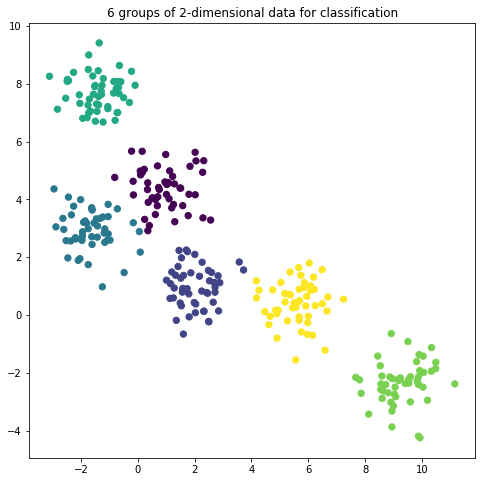

In [21]:
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.70, random_state=0)

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='viridis')

plt.title("6 groups of 2-dimensional data for classification")
plt.show()

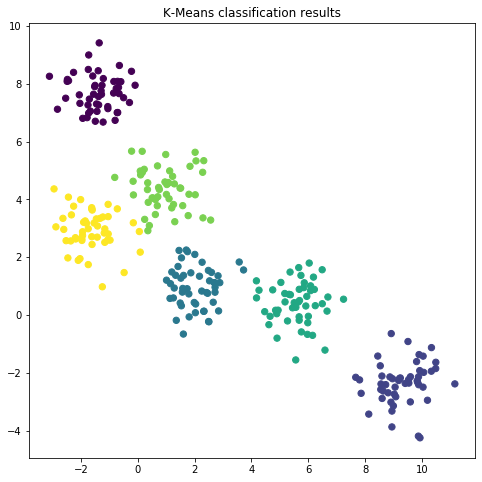

In [22]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

plt.title("K-Means classification results")
plt.show()

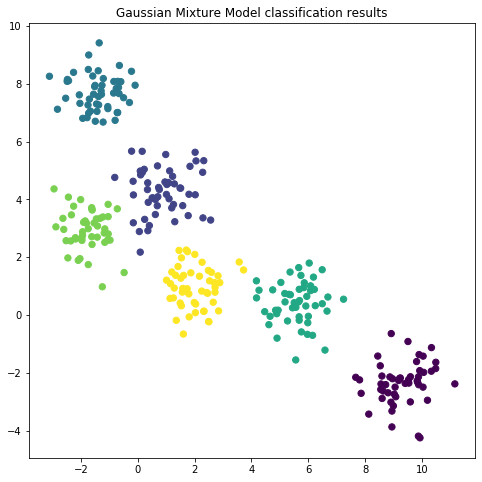

In [23]:
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("Gaussian Mixture Model classification results")
plt.show()

<b>Describe each sample for statistical tests</b>

In [24]:
def describe_quantitative_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values:   {column.isna().sum()}',
          f'\nVar: \t     {np.nanvar(column)}',
          f'\n{column.describe()}\n')

# create new dataframe containing samples for statistical tests
samples_df = pd.DataFrame()
samples_df['Platform_Sales'] = df[df['Genre'] == 'Platform']['Global_Sales'][: 886].values
samples_df['Shooter_Sales'] = df[df['Genre'] == 'Shooter']['Global_Sales'][: 886].values
samples_df['Role_Playing_Sales'] = df[df['Genre'] == 'Role-Playing']['Global_Sales'][: 886].values

describe_quantitative_column(samples_df['Platform_Sales'], 'GLobal sales of platform games (in millions)')
describe_quantitative_column(samples_df['Shooter_Sales'], 'Global sales of shooter games (in millions)')
describe_quantitative_column(samples_df['Role_Playing_Sales'], 'Global sales of role-playing games (in millions)')

samples_df

=== Platform_Sales column description === 

GLobal sales of platform games (in millions) 

Data type: 	float64 
NA values:   0 
Var: 	     6.675996457179401 
count    886.000000
mean       0.938341
std        2.585254
min        0.010000
25%        0.090000
50%        0.280000
75%        0.790000
max       40.240000
Name: Platform_Sales, dtype: float64

=== Shooter_Sales column description === 

Global sales of shooter games (in millions) 

Data type: 	float64 
NA values:   0 
Var: 	     4.489690150395671 
count    886.000000
mean       1.146738
std        2.120086
min        0.110000
25%        0.220000
50%        0.490000
75%        1.137500
max       28.310000
Name: Shooter_Sales, dtype: float64

=== Role_Playing_Sales column description === 

Global sales of role-playing games (in millions) 

Data type: 	float64 
NA values:   0 
Var: 	     4.529553284857502 
count    886.000000
mean       1.007675
std        2.129477
min        0.130000
25%        0.220000
50%        0.400000
75%  

,Platform_Sales,Shooter_Sales,Role_Playing_Sales
0,40.24,28.31,31.37
1,30.01,14.76,23.10
2,28.62,14.64,18.36
3,20.61,14.24,15.85
4,18.14,14.03,15.32
...,...,...,...
881,0.01,0.11,0.13
882,0.01,0.11,0.13
883,0.01,0.11,0.13
884,0.01,0.11,0.13


<b>Equality check in population of each sample</b>

In [25]:
def check_sample_normality(sample, alpha=0.05):
    # check if sample comes from gaussian distribution (Shapiro-Wilk test)
    stat, p = shapiro(sorted(sample))

    alpha = alpha

    print('\n=== Shapiro-Wilk normality test ===',
          '\np-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

def check_samples_equal_variance(sample_1, sample_2, sample_3, alpha=0.05):
    # check if the variance in every sample is simmilar enough (Bartlett test)
    stat, p = bartlett(sample_1, sample_2, sample_3)
    
    print('\n=== Bartlett test for the simmilarity of samples\' variances ===',
          '\np-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis') 

# checking if ANOVA can be conducted
def check_anova_assumptions(sample_1, sample_2, sample_3, alpha=0.05):
    
    # check if every sample comes from gaussian distribution
    check_sample_normality(sample_1)
    check_sample_normality(sample_2)
    check_sample_normality(sample_3)
    
    # check if the variance in each sample is simmilar enough (Bartlett test)
    check_samples_equal_variance(sample_1, sample_2, sample_3)
    
check_anova_assumptions(samples_df['Platform_Sales'], samples_df['Shooter_Sales'], samples_df['Role_Playing_Sales'])


=== Shapiro-Wilk normality test === 
p-value: 		 0.0
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Shapiro-Wilk normality test === 
p-value: 		 2.802596928649634e-45
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Shapiro-Wilk normality test === 
p-value: 		 0.0
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Bartlett test for the simmilarity of samples' variances === 
p-value: 		 5.757886315508564e-11
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


<b>Result:</b> every sample doesn't come from gaussian distribution and their variances aren't statistically simmilar => ANOVA can't be used so non-parametrical tests (Kruskal-Wallis and Friendman) will be used. 

<b>Kruskal-Wallis and Friedman tests for samples for which ANOVA can't be used</b>

In [26]:
stat, p = kruskal(samples_df['Platform_Sales'], samples_df['Shooter_Sales'], samples_df['Role_Playing_Sales'])

alpha = 0.05
    
print('\n=== Kruskal-Wallis test for 3 samples ===', 
      '\nH0: \t\t\t Every sample comes from distribution with a simmilar median', 
      '\nH1: \t\t\t At least one sample has a different median than the others \n\t\t\t (what results in a different median of its\' population)',
      '\n\np-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis') 

stat, p = friedmanchisquare(samples_df['Platform_Sales'], samples_df['Shooter_Sales'], samples_df['Role_Playing_Sales'])

alpha = 0.05
    
print('\n=== Friedman test for 3 samples ===',
      '\nH0: \t\t\t Every sample comes from distribution with a simmilar median', 
      '\nH1: \t\t\t At least one sample has a different median than the others \n\t\t\t (what results in a different median of its\' population)', 
      '\n\np-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis') 



=== Kruskal-Wallis test for 3 samples === 
H0: 			 Every sample comes from distribution with a simmilar median 
H1: 			 At least one sample has a different median than the others 
			 (what results in a different median of its' population) 

p-value: 		 7.562783398503258e-28
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Friedman test for 3 samples === 
H0: 			 Every sample comes from distribution with a simmilar median 
H1: 			 At least one sample has a different median than the others 
			 (what results in a different median of its' population) 

p-value: 		 1.517158711448157e-293
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


<b>Tukey's HSD test as post-hoc analysis to check pairwise which sample from example above doesn't have mean equal to others</b>

In [27]:
# prepare data
tukey_df = pd.DataFrame({'Platform': samples_df['Platform_Sales'],
                         'Shooter': samples_df['Shooter_Sales'],
                         'Role-Playing': samples_df['Role_Playing_Sales']})

stacked_data = tukey_df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'Genre',
                                            0:'Global_Sales'})

# run Tukey's HSD test
pairwise_tukeyhsd(stacked_data['Global_Sales'], stacked_data['Genre'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Platform,Role-Playing,0.0693,0.7788,-0.1857,0.3243,False
Platform,Shooter,0.2084,0.1342,-0.0466,0.4634,False
Role-Playing,Shooter,0.1391,0.4089,-0.1159,0.394,False


<b>One-sided (greater) Mann-Whitney U-test for two samples</b>

In [33]:
# check normality of two samples
def check_normality_two_samples(sample_1, sample_2, alpha=0.05):
    
    # check if both samples come from gaussian distribution (Shapiro-Wilk test)
    stat, p = shapiro(sorted(sample_1))

    alpha = alpha

    print('\n=== Shapiro-Wilk normality test for the first sample ===',
          '\np-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

    stat, p = shapiro(sorted(sample_2))

    print(f'\n=== Shapiro-Wilk normality test for the second sample ===',
          f'\np-value: \t\t {p}\nalpha: \t\t\t {alpha}\n')

    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    
        

def u_test(sample_1, sample_2):
    print('\nHypothesis: \t\t The global sales of the games of the first genre isn\'t statistically different \n\t\t\t than the global sales of the games of the second genre.')
    print('H1: \t\t The global sales of the games of the first genre are greater than the second genre')

    stat, p = mannwhitneyu(sample_1, sample_2, alternative='greater')

    alpha = 0.05

    print('\n=== One-sided (greater) Mann-Whitney U-test results ===',
          f'\nu-statistic value: \t {stat} \np-value: \t\t {p} \nalpha: \t\t\t {alpha}\n')

    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')
    
def conduct_u_test(sample_1, sample_2):
    check_normality_two_samples(sample_1, sample_2)
        
    print(f'\nMedian difference: \t {np.median(sample_1)-np.median(sample_2)}',
          f'\nMean difference: \t {np.mean(sample_1)-np.mean(sample_2)}')
      
    u_test(sample_1, sample_2)
    
# Platform games nad Shooter games U-test
print('=== Platform games and Shooter games samples\' test ===')
        
conduct_u_test(samples_df['Platform_Sales'], samples_df['Shooter_Sales'])
      
# Platform games nad Role-Playing games U-test
print('\n=== Platform games and Role-Playing games samples\' test ===')
        
conduct_u_test(samples_df['Platform_Sales'], samples_df['Role_Playing_Sales'])

# Shooter games nad Role-Playing games U-test
print('\n=== Shooter games and Role-Playing games samples\' test ===')
        
conduct_u_test(samples_df['Shooter_Sales'], samples_df['Role_Playing_Sales'])

=== Platform games and Shooter games samples' test ===

=== Shapiro-Wilk normality test for the first sample === 
p-value: 		 0.0
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Shapiro-Wilk normality test for the second sample === 
p-value: 		 2.802596928649634e-45
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

Median difference: 	 -0.20999999999999996 
Mean difference: 	 -0.20839729119638817

Hypothesis: 		 The global sales of the games of the first genre isn't statistically different 
			 than the global sales of the games of the second genre.
H1: 		 The global sales of the games of the first genre are greater than the second genre

=== One-sided (greater) Mann-Whitney U-test results === 
u-statistic value: 	 282009.5 
p-value: 		 1.0 
alpha: 			 0.05

Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Platform games and Role-Playing gam

<b>Result: Shooter > Role-Playing > Platform</b>

<b>Test if the median of the population is statistically lower than 110% of the sample median</b>

In [35]:
def conduct_sign_test(sample, median_value, alpha=0.05):
    print(f'\nHypothesis: \t\t The MEDIAN of global sales of the games of the genre isn\'t statistically different \n\t\t\t than {median_value * 1.1} (original sample median: {median_value})')

    stat, p = sign_test(sample, median_value * 1.1)

    print('\n=== One-sample Signs Test results ===',
          f'\nM-statistic value: \t {stat} \np-value: \t\t {p/2} \nalpha: \t\t\t {alpha}\n')

    if p/2 <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis\n')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis\n')
        
# Platform games signs test
print('=== Platform games sign\'s test ===')
        
conduct_sign_test(samples_df['Platform_Sales'], samples_df['Platform_Sales'].median())

# Shooter games signs test
print('=== Shooter games sign\'s test ===')
        
conduct_sign_test(samples_df['Shooter_Sales'], samples_df['Shooter_Sales'].median())

# Role-Playing games signs test
print('=== Role-Playing games sign\'s test ===')
        
conduct_sign_test(samples_df['Role_Playing_Sales'], samples_df['Role_Playing_Sales'].median())

=== Platform games sign's test ===

Hypothesis: 		 The MEDIAN of global sales of the games of the genre isn't statistically different 
			 than 0.30800000000000005 (original sample median: 0.28)

=== One-sample Signs Test results === 
M-statistic value: 	 -29.0 
p-value: 		 0.02771863171338983 
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Shooter games sign's test ===

Hypothesis: 		 The MEDIAN of global sales of the games of the genre isn't statistically different 
			 than 0.539 (original sample median: 0.49)

=== One-sample Signs Test results === 
M-statistic value: 	 -27.0 
p-value: 		 0.03746165084951174 
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Role-Playing games sign's test ===

Hypothesis: 		 The MEDIAN of global sales of the games of the genre isn't statistically different 
			 than 0.44000000000000006 (original sample median: 0.4)

=== One-sample Sig

<b>Generate 95% and 99% confidence intervals for each sample mean and variance (relying on Central Limit Theorem the distribution of mean is asymptotically normal when the distribution of sample is not normal and contains more than 30 elements).</b>

In [30]:
def var_conf_interval(arr, alpha):
    alpha = alpha              # significance level, e.g. 0.05
    n = len(arr)               # sample size
    s2 = np.var(arr, ddof=1)   # sample variance
    df = n - 1                 # degrees of freedom

    upper = (n - 1) * s2 / stats.chi2.ppf(alpha / 2, df)
    lower = (n - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, df)
    
    return (lower.round(3), upper.round(3))

# 95% confidence intervals for mean
print(f'95% platform games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Platform_Sales"]).tconfint_mean(alpha=0.05)[0].round(3)}, {DescrStatsW(samples_df["Platform_Sales"]).tconfint_mean(alpha=0.05)[1].round(3)})')

print(f'95% shooter games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Shooter_Sales"]).tconfint_mean(alpha=0.05)[0].round(3)}, {DescrStatsW(samples_df["Shooter_Sales"]).tconfint_mean(alpha=0.05)[1].round(3)})')

print(f'95% role-playing games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Role_Playing_Sales"]).tconfint_mean(alpha=0.05)[0].round(3)}, {DescrStatsW(samples_df["Role_Playing_Sales"]).tconfint_mean(alpha=0.05)[1].round(3)})')

# 99% confidence intervals for mean
print(f'\n99% platform games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Platform_Sales"]).tconfint_mean(alpha=0.01)[0].round(3)}, {DescrStatsW(samples_df["Platform_Sales"]).tconfint_mean(alpha=0.01)[1].round(3)})')

print(f'99% shooter games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Shooter_Sales"]).tconfint_mean(alpha=0.01)[0].round(3)}, {DescrStatsW(samples_df["Shooter_Sales"]).tconfint_mean(alpha=0.01)[1].round(3)})')

print(f'99% role-playing games sales mean confidence interval: \t\t({DescrStatsW(samples_df["Role_Playing_Sales"]).tconfint_mean(alpha=0.01)[0].round(3)}, {DescrStatsW(samples_df["Role_Playing_Sales"]).tconfint_mean(alpha=0.01)[1].round(3)})')

# 95% confidence intervals for variance
print(f'\n95% platform games sales variance confidence interval: \t\t{var_conf_interval(samples_df["Platform_Sales"], alpha=0.05)}')

print(f'95% shooter games sales variance confidence interval: \t\t{var_conf_interval(samples_df["Shooter_Sales"], alpha=0.05)}')

print(f'95% role-playing games sales variance confidence interval: \t{var_conf_interval(samples_df["Role_Playing_Sales"], alpha=0.05)}')

# 99% confidence intervals for variance
print(f'\n99% platform games sales variance confidence interval: \t\t{var_conf_interval(samples_df["Platform_Sales"], alpha=0.01)}')

print(f'99% shooter games sales variance confidence interval: \t\t{var_conf_interval(samples_df["Shooter_Sales"], alpha=0.01)}')

print(f'99% role-playing games sales variance confidence interval: \t{var_conf_interval(samples_df["Role_Playing_Sales"], alpha=0.01)}')


95% platform games sales mean confidence interval: 		(0.768, 1.109)
95% shooter games sales mean confidence interval: 		(1.007, 1.287)
95% role-playing games sales mean confidence interval: 		(0.867, 1.148)

99% platform games sales mean confidence interval: 		(0.714, 1.163)
99% shooter games sales mean confidence interval: 		(0.963, 1.331)
99% role-playing games sales mean confidence interval: 		(0.823, 1.192)

95% platform games sales variance confidence interval: 		(6.102, 7.353)
95% shooter games sales variance confidence interval: 		(4.104, 4.945)
95% role-playing games sales variance confidence interval: 	(4.14, 4.989)

99% platform games sales variance confidence interval: 		(5.932, 7.579)
99% shooter games sales variance confidence interval: 		(3.989, 5.097)
99% role-playing games sales variance confidence interval: 	(4.025, 5.143)
